# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


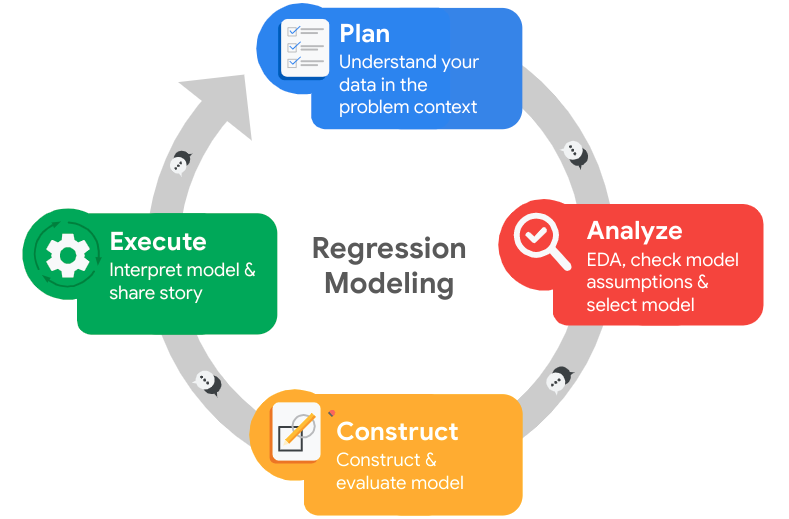

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The primary stakeholders are the HR individuals who need insights from the data to help with employee retention. Secondary stakeholders include business executives from all departments.

I hope to develop a model that can predict employee retention. Ideally, the model will give insight into the primary cause(s) for empolyee departure. These causes can then be addressed by HR and management to invest in employees to create a better work culture and retention rate.

Intitial observations: I appreciate that some variable are already in dummy format. Renaming some variables may be helpful. With approximately 15,000 employees, anonymity is fairly certain. Since salary is categorical, it will need to be encoded, but it will also preserve anonymity.


The most important ethical considerations are employee anonymity and information security. Based on the data overview, the data is already anonymized, and there are not any identifying categories, such as gender or race. Interestingly, these data could be helpful to determine if there is a lack of support for certain identity groups, but we will be unable to examine that avenue in this case.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [40]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("/Users/aaronkeeney/Documents/Data_Analytics_Projects/Adv_Google_Cert_Notebooks/Salifort_Motors_Capstone/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# column names that need to change

mapper = {'average_montly_hours' : 'average_monthly_hours', 
                       'number_project' : 'number_projects', 
                       'Department' : 'department', 
                       'Work_accident' : 'work_accident', 
                       'time_spend_company' : 'tenure'}

In [8]:
# Rename columns as needed
df0 = df0.rename(columns = mapper)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()


3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep = 'first')].sort_values(['department', 'satisfaction_level'])

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12140,0.09,0.96,6,245,4,0,1,0,IT,low
12445,0.09,0.94,6,283,5,0,1,0,IT,low
12528,0.09,0.80,6,301,5,0,1,0,IT,medium
12595,0.09,0.87,5,263,4,0,1,0,IT,low
14351,0.09,0.96,6,245,4,0,1,0,IT,low
...,...,...,...,...,...,...,...,...,...,...
13724,0.98,0.49,3,199,10,0,0,0,technical,medium
12859,0.99,0.81,3,183,2,0,0,0,technical,low
13441,0.99,0.84,4,142,10,0,0,0,technical,high
13007,1.00,0.55,4,186,4,1,0,0,technical,medium


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first', ignore_index = True)


# Display first few rows of new dataframe as needed
print(df1.shape)

df1.head()


(11991, 10)


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: xlabel='tenure'>

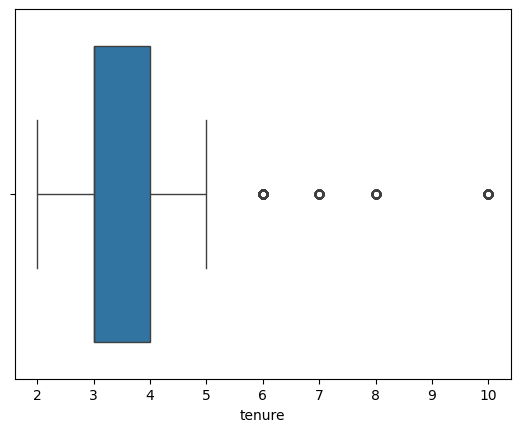

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(data = df1, x = 'tenure')


In [14]:
# Determine the number of rows containing outliers

q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)

iqr = q3 - q1

outliers = df1[df1['tenure'] > q3 + (1.5 * iqr)] + df1[df1['tenure'] < q1 - (1.5 * iqr)]

print(f"There are {len(outliers)} outliers within our dataset.")


There are 824 outliers within our dataset.


**Quick note:**
The outliers here are all to the high side (right skew). This would drag our mean higher than our median. For this classification task, this is likely not an issue. Tree-based models should not be disrupted by this, but a logistic regression model potentially could be. We will re-evaluate this later. However, my instinct is that employees with longer tenures will be easier to predict (in a business setting, not in the model), as they have already been retained for a fair number of years. 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
df1[['left']].value_counts()


left
0       10000
1        1991
Name: count, dtype: int64

In [16]:
# Get percentages of people who left vs. stayed
df1[['left']].value_counts(normalize = True)*100


left
0       83.39588
1       16.60412
Name: proportion, dtype: float64

### Data visualizations

Here, we examine variables as histograms as a quick check for insights to investigate further.

In [17]:
# List of columns for easy reference
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

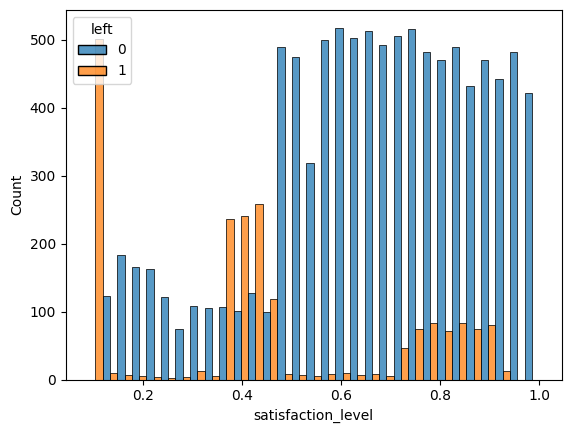

In [18]:
# Create a plot as needed
sns.histplot(data = df1, x = 'satisfaction_level', hue = 'left', multiple = 'dodge');

It appears that many employees with low satisfaction left. This is hardly surprising. However, a fair number of employees with high satisfaction left as well. This is definitely concerning, as we would like to retain happy employees. Additionally, if these employees are leaving for other jobs, this could be indicative that we are losing top talent. We will examine retention vs evaluation criteria later to examine this possibility.

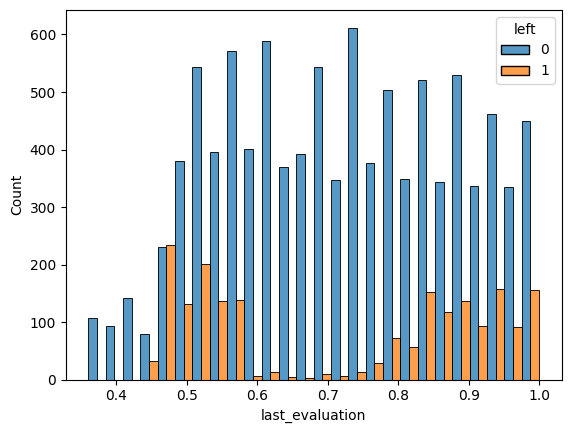

In [19]:
# Create a plot as needed
sns.histplot(data = df1, x = 'last_evaluation', hue = 'left', multiple = 'dodge');

Here, we see that a higher proportion of low evaluations left (possibly fired or laid off). More concerning is the higher proportions of high-performing employees who left. This indicates that we are failing to retain our top talent, which is undoubtedly an expensive issue that needs to be rectified.

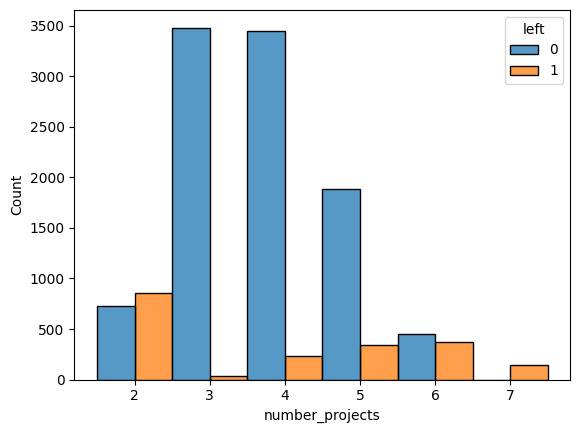

In [20]:
# Create a plot as needed
sns.histplot(data = df1, x = 'number_projects', hue = 'left', multiple = 'dodge', discrete = True);

It appears that as the number of projects increases, so does the probability that an employee leaves. In fact, all employees who were assigned to 7 projects left, as did almost half of those assigned to 6 projects.

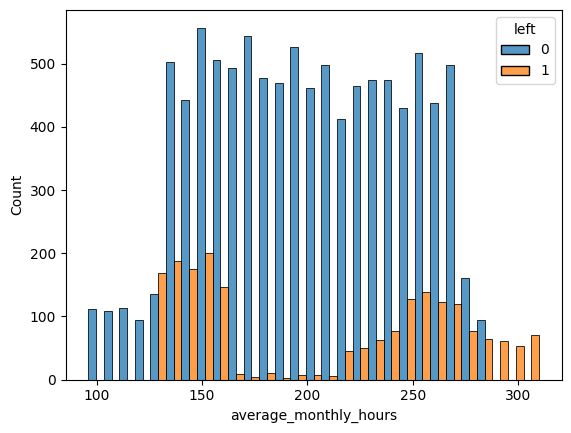

In [21]:
# Create a plot as needed
sns.histplot(data = df1, x = 'average_monthly_hours', hue = 'left', multiple = 'dodge');

Again, we see a trend of employees who worked the most (measured in hours this time) left the company. This indicates a culture of unsustainable workload that is creating burnout in our top employees.

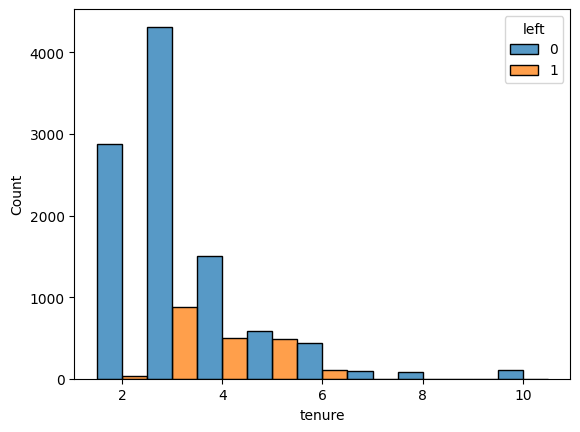

In [22]:
# Create a plot as needed
sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', discrete = True);

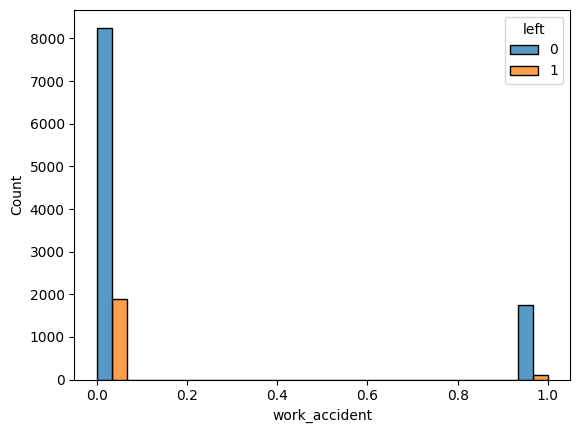

In [23]:
# Create a plot as needed
sns.histplot(data = df1, x = 'work_accident', hue = 'left', multiple = 'dodge');

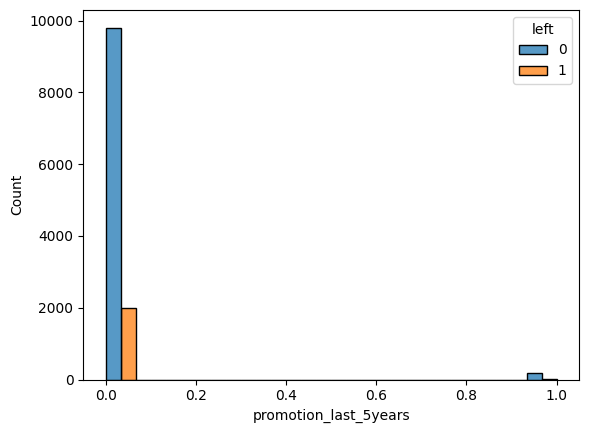

In [24]:
# Create a plot as needed
sns.histplot(data = df1, x = 'promotion_last_5years', hue = 'left', multiple = 'dodge');

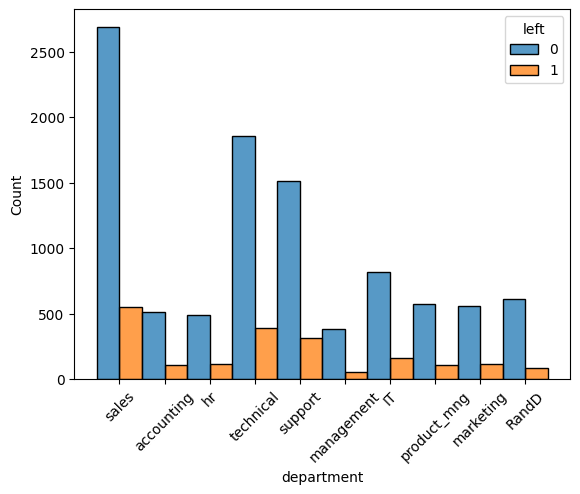

In [25]:
plot = sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge')

plt.xticks(rotation = 45)
plt.show()

There are no obvious outliers by department, indicating that there is not a single department with issues. More likely, this is a wider company culture clash, rather than one or two instances of poor management.

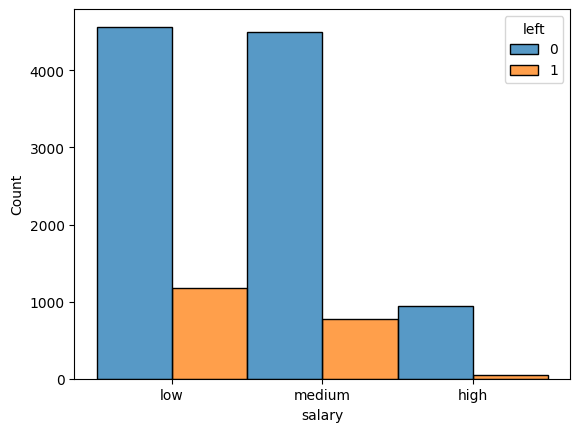

In [26]:
sns.histplot(data = df1, x = 'salary', hue = 'left', multiple = 'dodge');

### Insights

Creating histograms for our variables has given us some initial insights that we will want to examine through our models that we build. Several characteristics of the plots above are intriguing:

1. Satisfaction level seems to be a very strong indicator. It is one of the only metrics where we see the number of exiting employees as higher than the number who stayed at some values of the metric. This is self-reported, and it would insinuate that we have readily available and applicable information at hand to make informed decisions.


2. Among people who left, several variables appear to be multi-modal. Satisfaction level, evaluation results, and monthly hours worked appear to have diverging values within these populations. Actual models will help us be more specific about this, but any time a divergence like this appears, it is a strong indicator of a classifying characteristic that could be noticed day-to-day by management. For example, if someone is working too much, they may become burnt out and leave. If someone is only working a little, they may already be considering an exit. This is not a prediction, but a theory that we will want to examine later.


3. These multi-modal variables could also indicate some multicollinearity. We will need to check for that before proceeding with the model.


4. Tenure appears to have a strong influence on retention. At 2-3 years, many more people stay. By year 6, as many people are leaving as are staying. This would hint that the company may need to find better incentives to keep that experience talent around, if that is an important objective for management.


5. There is almost no evidence of promotions. We will include this variable in our study initially, but with no one receiving a promotion and leaving, as well as a major class imbalance in this variable, we may encounter some difficulty here. However, given point 2 above, there may be an important interaction here.

With these in mind, let's examine some ideas in more detail. We will beging with examining the possibility that employees are overworked.

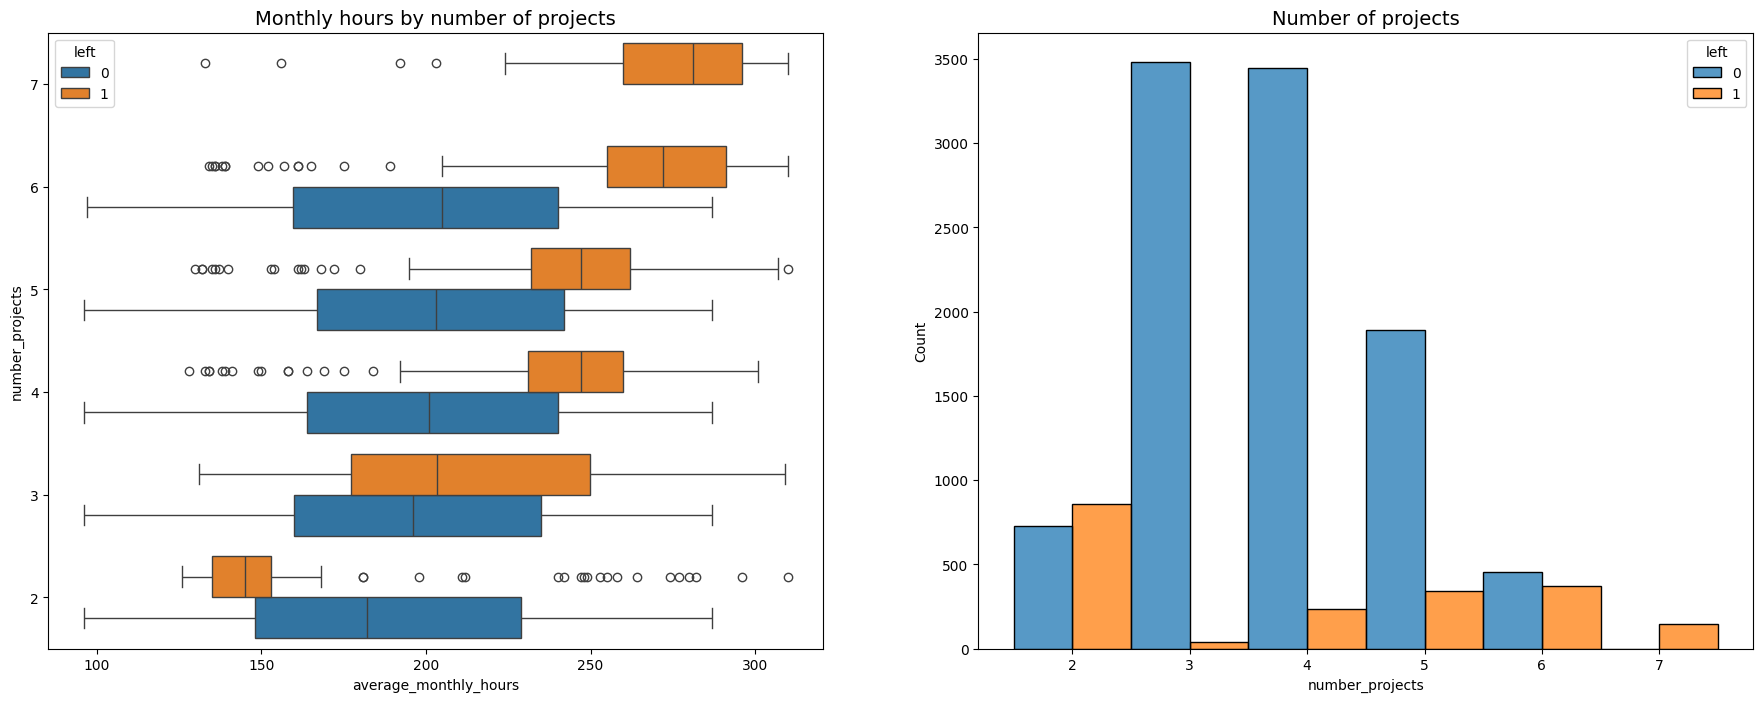

In [27]:
# Create plot with two subplots
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# First plot: histogram showing monthly hours, number of projects, and employee retention
sns.boxplot(data=df1, x='average_monthly_hours', y='number_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Second plot: A copy of the previous histogram, showing employee retention vs number of projects
sns.histplot(data = df1, x = 'number_projects', hue = 'left', multiple = 'dodge', discrete = True)
ax[1].set_title('Number of projects', fontsize='14')

plt.show()

This pair of visuals demonstrates several clear insights. On the left, we can see that employees who leave are consistently working more than those who stay, with the notalbe exception of those working the least on two projects. These exceptions are not cause for concern, since retaining our least productive employees is not of great concern. However, seeing that our hardest workers are leaving is cause for alarm. This is clearest on the right, where we can see that ALL employees working 7 projects left, and about half of those working 6 projects.

Note that for a standard 40-hour workweek, the expected number of hours worked per month is about 167:

40 hours/week * 50 weeks/year / 12 months/year = 166.67 hours/month

This will be a relevant reference in future plots and discussion.

Next, we should examine the role of promotions in employee satisfaction, tenure, and turnover. The most natural questions are, perhaps, "Are employees who work the hardest getting promotions? Do promotions keep employees at the company?" The visuals below illustrate these ideas.

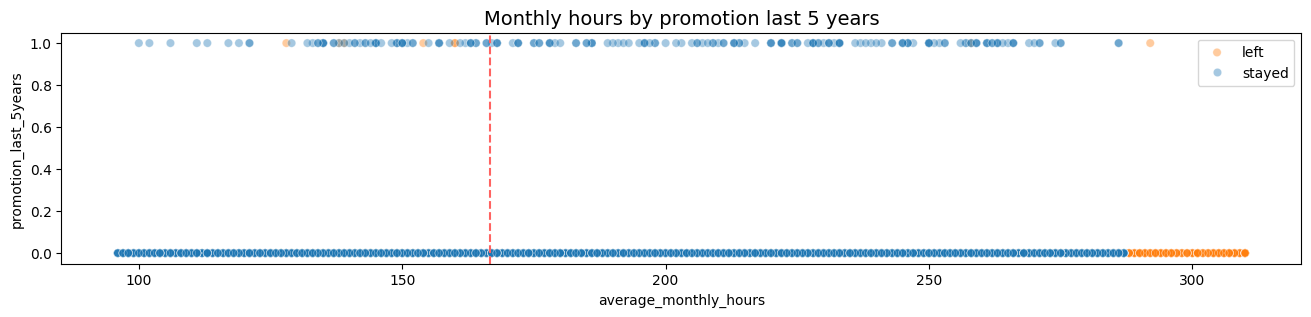

In [28]:
# Scatterplot to examine the relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

From the plot above, we can see that very few promotions were given to the employees who worked the most. Additionally, these employees all left. This shows that we are failing to retain our hardest workers, and promotions may be a way to keep them. Very few employees who received promotions left, but it may not be enough to overcome the enormous workload around 300 hrs/month.

Finally, we should examine if the employees with promtions in the last five years are more likely to stay, or at least if their satisfaction is higher. In the plot below, we can see that there are very few employees who received promotions who are dissatisfied.

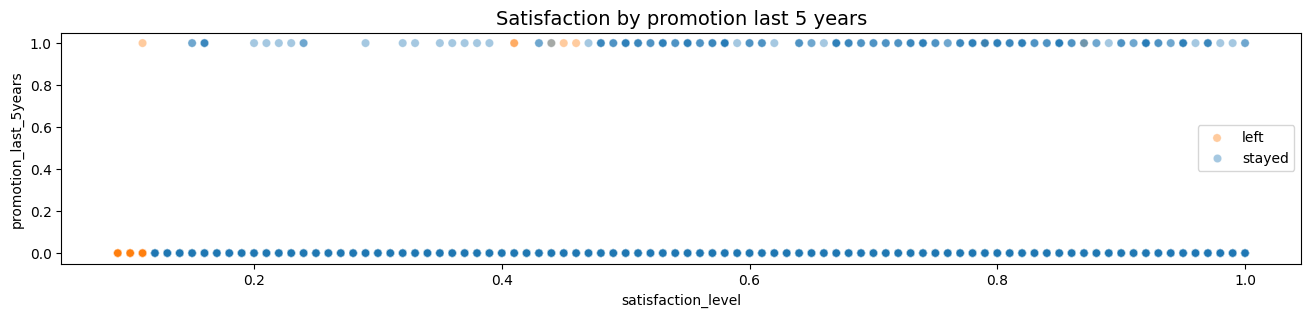

In [29]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='satisfaction_level', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Satisfaction by promotion last 5 years', fontsize='14');

Finally, we should examine if promotions are correlated with evaluations. This is a crucial step for management, as we want to ensure that productivity and quality are being incentived by company policy and compensation packages. The chart below does not show any obvious relationship between promotions and performance (last evaluation). This should be a major concern for management, as it is not conducive to an equitable work environment where employees will feel valued and appreciated. At best, this shows a lack of meritocracy, at worst, it is a symptom of favoritism. This should be a focus area moving forward.

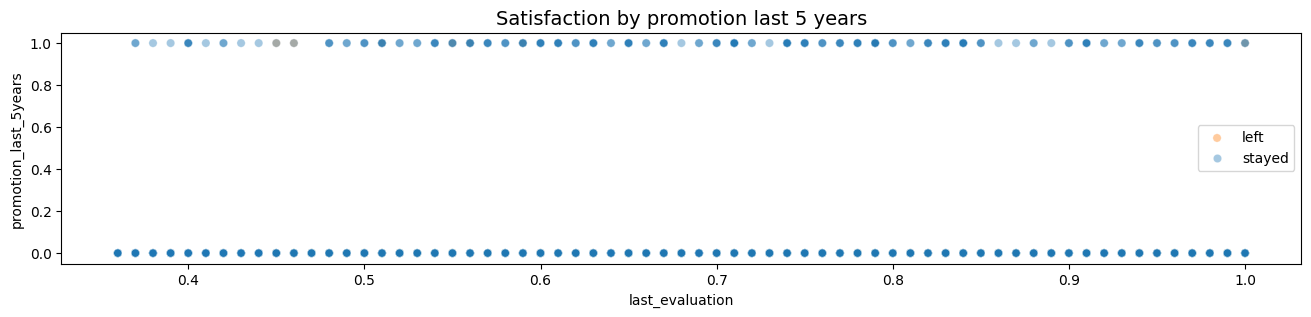

In [30]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='last_evaluation', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Satisfaction by promotion last 5 years', fontsize='14');

### Data Preparation and Processing ###

In [31]:
# Create dummy variables for categorical variables
df_dummies = pd.get_dummies(df1, columns = ['department', 'salary'])
df_dummies.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


At this point, we can split the data into independent and dependent variables and begin constructing the model. Several approaches are viable; however, we will be using only the binary variable 'left' as our dependent variable. Initially, we will include all other variables in our model. We may eliminate some variables in later model iterations if that is helpful.

In [32]:
# Split data into dependent and independent variables

y = df_dummies[['left']]
X = df_dummies.drop(columns = 'left')

In [33]:
# Split data into training, validation, and testing sets.

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, random_state = 42)

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

As we are trying to predict only whether or not an employee will decide to leave, this is is a classification task. We could try to assign a probability with a regression model, but that is less helpful in this business case.

### Identify the types of models most appropriate for this task.

Logistic regression, tree-based models and boosted models could all work here. There are several concerns to consider. While logistic regression would be appropriate, it is senistive to outliers, meaning categories like tenure could be problematic, since so many of those data points are considered outliers. Additionally, correlation withing variables is cause for concern. The heatmap below shows some of those correlations.

In [34]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

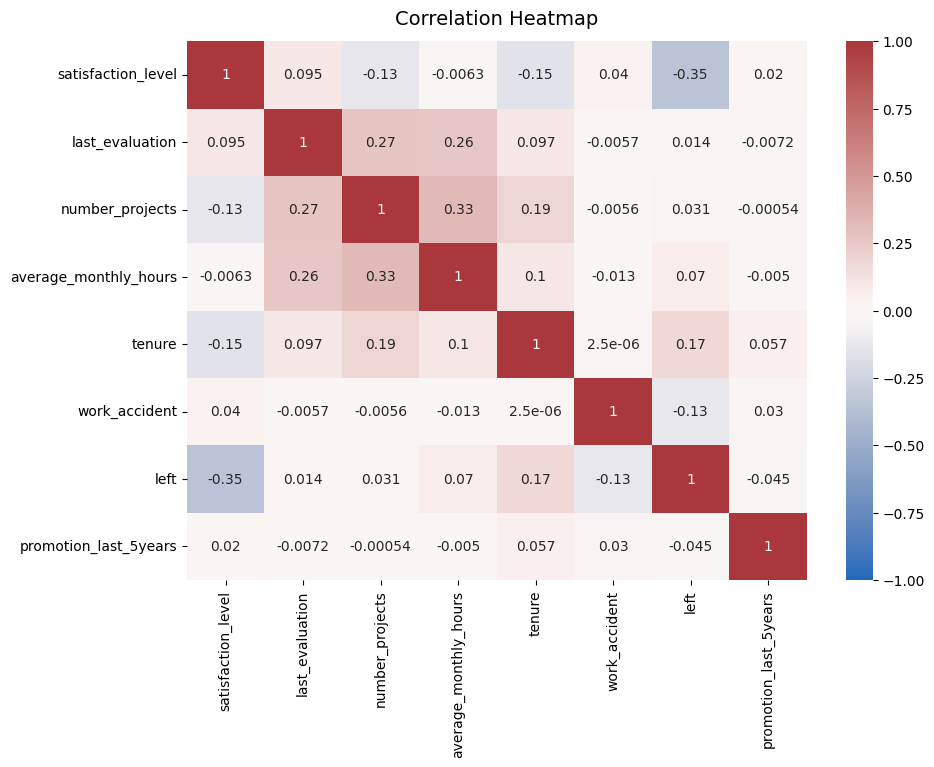

In [35]:
numeric_columns = df1[['satisfaction_level', 'last_evaluation', 'number_projects', 'average_monthly_hours', 'tenure', 
                          'work_accident', 'left','promotion_last_5years']]

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(numeric_columns.corr(), 
                      vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

While none of these correlations are extreme. There are several that are non-negligible. For this reason, we will proceed with only the random forest and boosted models. These models tend to be more robust with our type of data, and they will still offer interpretable results and powerful classification capabilities.

### Modeling

#### Tree-based Approach ####

In [36]:
%%time

# A simple decision tree model

dt = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth': [10, 20, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': ['sqrt', 10, None]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

dt_cv = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='f1')

dt_cv.fit(X_train, y_train)

CPU times: user 13.1 s, sys: 183 ms, total: 13.3 s
Wall time: 13.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 10, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [37]:
print(dt_cv.best_params_) 

print(dt_cv.best_score_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9426251202454516


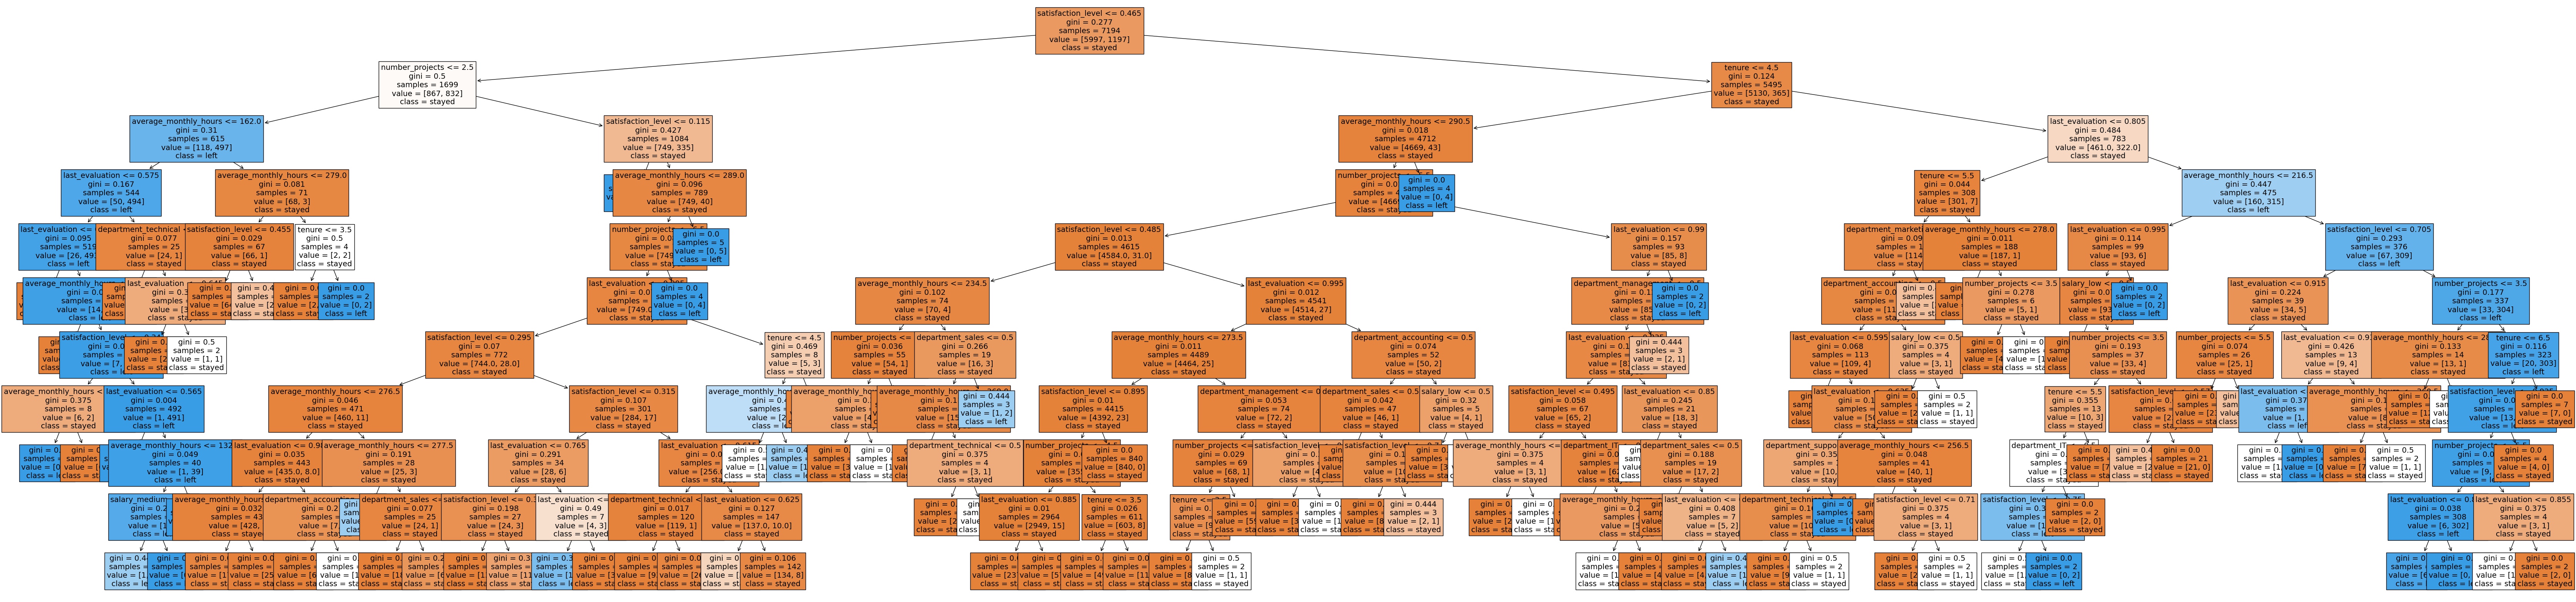

In [38]:
# This is the full decsion tree
# Best viewed in a separate window for examination

plt.figure(figsize=(85,20))
plot_tree(dt_cv.best_estimator_, max_depth=10, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

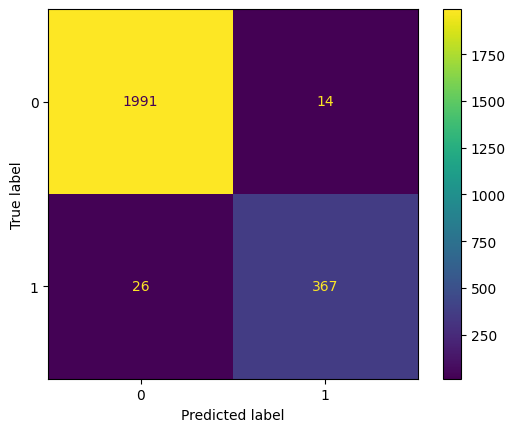

In [39]:
y_pred_dt = dt_cv.predict(X_val)

cm = confusion_matrix(y_val, y_pred_dt, labels = dt_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dt_cv.classes_)
disp.plot();

In [42]:
%%time

#This is a Random Forest Classifier approach

rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [5,10,20],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

# This prevents an enormous list of warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    rf_cv.fit(X_train, y_train)

CPU times: user 23min 9s, sys: 21.2 s, total: 23min 30s
Wall time: 24min 13s


In [43]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 125}
0.9535653114174977


In [44]:
# Create a table of results from the Random Forest Model

def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.953565,0.919836,0.99003,0.985127


From this table of results, we can see that this model FAR exceeds the capabilities of the logistic regression model. This is not terribly surprising, as there is much more felxibility with a random forest model. Here, we see a much higher recall, precision, and f1, so we are confident that we will be able to predict employees who will leave with a high degree of certainty. Below is a confusion matrix for our random forest model.

In [45]:
X_val

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
8742,0.27,0.86,3,222,5,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True
1709,0.11,0.96,6,310,4,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False
5076,0.72,0.63,3,149,2,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True
8777,0.98,0.62,3,140,4,0,0,False,False,False,False,False,True,False,False,False,False,False,True,False
10157,0.55,0.83,3,157,2,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0.93,0.75,3,243,2,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
262,0.44,0.56,2,131,3,0,0,False,False,False,True,False,False,False,False,False,False,False,False,True
6717,0.87,0.95,3,242,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
9136,0.72,0.97,3,239,3,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False


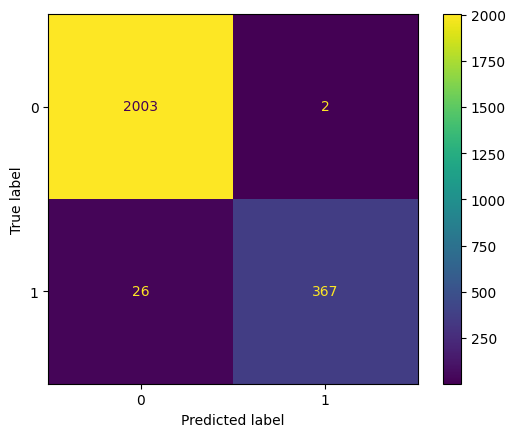

In [57]:
y_pred_rf = rf_cv.predict(X_val)

cm = confusion_matrix(y_val, y_pred_rf, labels = rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_cv.classes_)
disp.plot();

Here, we only failed to predict 26 employees out of approximately 400 employees who left. This would be acceptable for use within the organization.

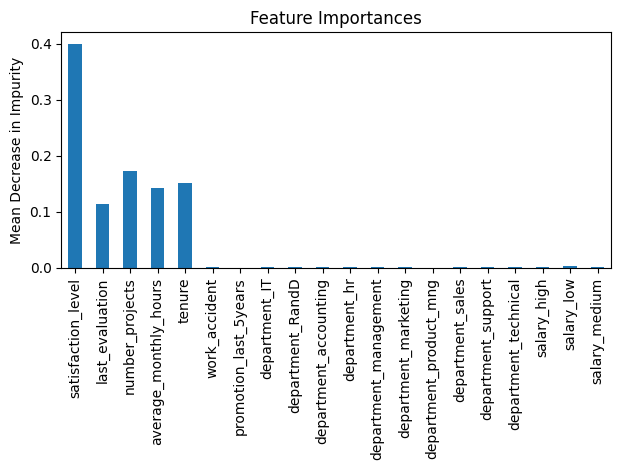

In [46]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()

The Feature Importance Graph above shows us that satisfaction level, evaluation, number of projects, average hours worked, and tenure are the most important features. Satisfaction level is by far the most important, indicating that this is a crucial metric that HR should be monitoring.

In [48]:
# Pickle the model
# Alter file path
path = '/Users/aaronkeeney/Documents/Data_Analytics_Projects/Adv_Google_Cert_Notebooks/Salifort_Motors_Capstone'

with open(path+'salifort_motors_rf_model', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [50]:
# Load a pickled model
path = '/Users/aaronkeeney/Documents/Data_Analytics_Projects/Adv_Google_Cert_Notebooks/Salifort_Motors_Capstone'

with open(path+'salifort_motors_rf_model', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

#### Boosted Model Approach

In [52]:
%time

# Here, we implement an XGBoost model

xgb = XGBClassifier(objective='binary:logistic', random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'f1')

xgb_cv.fit(X_train, y_train)

CPU times: user 5 µs, sys: 8 µs, total: 13 µs
Wall time: 33.6 µs


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [53]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 500}

In [54]:
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.94417,0.911468,0.979557,0.982068


Based on the results tables, the Random Forest Model still seems to be our best. For the sake of completeness, below are the visualizations associated with the XGBoost model.

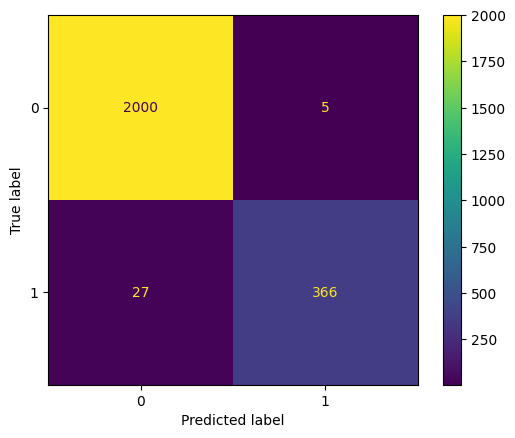

In [55]:
y_pred_xgb = xgb_cv.predict(X_val)

cm = confusion_matrix(y_val, y_pred_xgb, labels = xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)
disp.plot();

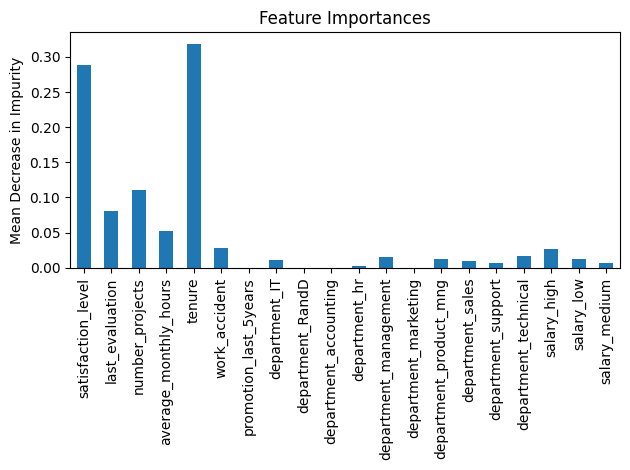

In [56]:
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()

Unsurprisingly,  we see the same features as the primary contributors for the XGBoost model as the random forest model, albeit in different levels. However, we do not get quite the same clarity. Thus, the Random Forest model will be selected as our champion model, since we will have easier explainability as well as better validation results. The champion model results on the test data are shown below.

In [57]:
# Pickle the boosted model
path = '/Users/aaronkeeney/Documents/Data_Analytics_Projects/Adv_Google_Cert_Notebooks/Salifort_Motors_Capstone'

with open(path+'salifort_motors_xgboost_model', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

#### Champion Model ####

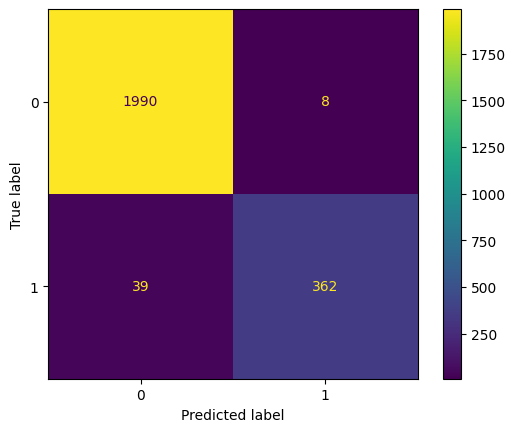

In [58]:
# Predict and evaluate test data with the champion random forest model

y_pred_champion = rf_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred_champion, labels = rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_cv.classes_)
disp.plot();

Based on this confusion matrix, we see that the champion model is likely slightly overfitted. These results are certainly still usable, but this model does not perform as well on the testing data set as it did on the validation set. Still, these results are very promising.

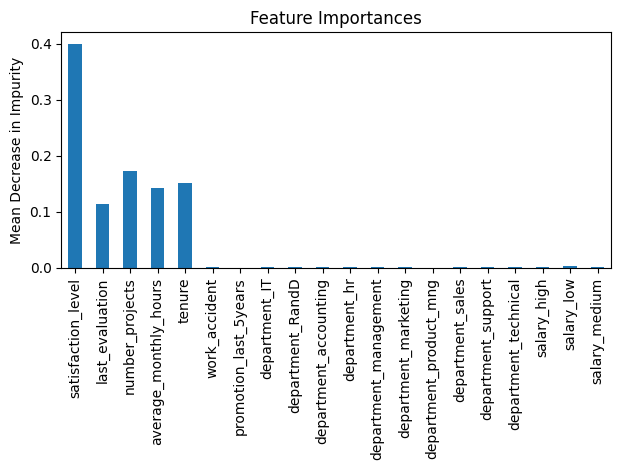

In [59]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
fig.tight_layout()

In [60]:
target_labels = ['stayed', 'left']
print(classification_report(y_test, y_pred_champion, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.98      1.00      0.99      1998
        left       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



From our champion model, it is clear that the most important feature is employee satisfaction. Other important factors include work load (both number of projects and number of hours), tenure, and the most recent evaluation.

From a business perspective, working on increasing self-reported employee satisfaction is paramount for increasing retention. The infrastructure for getting this information already exists, so we need to better understand what specific factors are driving employee satisfaction. This would be best accomplished by sampling employees from different departments, locations, etc. This is a tougher experiment to design, but that is for the next project.

Recommendations: I would suggest that HR begin asking for employees to submit the main reasons that drive satisfaction/dissatisfaction. Since many employees from both ends of the spectrum are giving feedback, we will likely receive helpful feedback in the form of both positive and negative reviews. This information can then be used to develop specific strategies.

Interestingly, there does not seem to be dissatisfaction with compensation, as pay does not seem to influence retention. Work load, however, appears to be one of the main factors driving loss of employees. We should consider strategies for reducing demands on individual employees.

Finally, some ethical concerns: While our model is anonymized, we need to be cautious moving forward. We can enter a specific eployee's metrics into the model, but it may not be ethical to 'track' employees in this manner. When the data is anonymized, we are unable to apply it on a case-by-case basis. It will still be useful for making institution-wide changes, but targeting specific employees will be at least unethical, and possibly illegal.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

See 'Champion Model' section above.

### Conclusion, Recommendations, Next Steps

Our model can be deployed with a high degree of confidence. On the test data, it correctly identified 90% of the individuals who left the organization. This will give us the predictive power to identify trends that could lead to a mass exodus of employees, and ideally, prevent and reverse those trends.

As stated above, Salifort Motors should expand its employee satisfaction surveys to get self-reported causes of employee dissatisfaction. Additionally, it should look for ways to distribute labor equitably among employees. There appears to be a 'happy medium' in the 160-200 monthly hours range. While we do not have the available data to examine employee classification (full-time, part-time, contractor, etc.), this could be a helpful area for further investigation. These strategies involve solutions beyond simply throwing money at the problem, and provide avenues to explore systemic changes for greater employee satisfaction.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.